YOUR NAME
 - Linh Vu


DS325, Gettysburg College, Professor Eatai Roth
# Problem Set 2 - Classification

Due Friday Mar 28, 2025 4p

Total pts: 30

## IMPORTANT INSTRUCTIONS:

 - When you submit your code, make sure that every cell runs without returning an error.
 - Once you have the results you need, edit out any extraneous code and outputs.
 - *Do not rewrite code* if it doesn't need to be rewritten. For example, all the import statements you should need are in the first code block. Do not redo those in your analysis.

## Problem 1

In this problem, you'll be comparing Logistic Regression, Decision Trees, and Random Forests in a task identifying mushrooms as edible or poisonous.
The data is imported below and the features and feature values are listed. Notice, they're all letters.

 - Split the data into targets and features
 - Decide which features are ordinal or categorical. Refer to the feature descriptions on the [UCI Machine Learning site](https://archive.ics.uci.edu/dataset/73/mushroom) (hint: at least 3 categories are ordinal and others are binary...so you'll use an ordinal encoder)
 - Encode the features
 - Train the three models. You will want to use ```LogisticRegressionCV``` and ```GridSearchCV``` to find the best version of each model.
 - Make predictions with your models.
 - Show the confusion matrices for each type of model evaluated on the same test set. Label each figure clearly as to which model it is.

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, confusion_matrix, recall_score, precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#data set
mushrooms_df = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/mushrooms.csv')
for k, col in enumerate(mushrooms_df.columns):
    print(f'{k:>3}. {col} - {mushrooms_df[col].unique()}')

  0. type - ['p' 'e']
  1. cap_shape - ['x' 'b' 's' 'f' 'k' 'c']
  2. cap_surface - ['s' 'y' 'f' 'g']
  3. cap_color - ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
  4. bruises - ['t' 'f']
  5. odor - ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
  6. gill_attachment - ['f' 'a']
  7. gill_spacing - ['c' 'w']
  8. gill_size - ['n' 'b']
  9. gill_color - ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
 10. stalk_shape - ['e' 't']
 11. stalk_root - ['e' 'c' 'b' 'r' '?']
 12. stalk_surface_above_ring - ['s' 'f' 'k' 'y']
 13. stalk_surface_below_ring - ['s' 'f' 'y' 'k']
 14. stalk_color_above_ring - ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
 15. stalk_color_below_ring - ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
 16. veil_type - ['p']
 17. veil_color - ['w' 'n' 'o' 'y']
 18. ring_number - ['o' 't' 'n']
 19. ring_type - ['p' 'e' 'l' 'f' 'n']
 20. spore_print_color - ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
 21. population - ['s' 'n' 'a' 'v' 'y' 'c']
 22. habitat - ['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [3]:
X = mushrooms_df.drop('type', axis=1)
y = (mushrooms_df['type'] == 'e').astype(int)

In [4]:
#encoder:
ord_features = ['gill_attachment', 'gill_spacing', 'gill_size', 'stalk_shape', 'bruises', 'ring_number']
cat_features = [col for col in X.columns if col not in ord_features]

preprocessor = ColumnTransformer([
    ('ord', OrdinalEncoder(), ord_features),
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), cat_features)
], remainder='passthrough', verbose_feature_names_out=False)

X_proc = preprocessor.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_proc, y, test_size=0.2, random_state=42)

In [5]:
#log regression
lr = LogisticRegressionCV(cv=5, max_iter=1000).fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [6]:
# Decision Tree
tree_clf = GridSearchCV(DecisionTreeClassifier(random_state=42), {
    'max_depth': [4, 6, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}, cv=5).fit(X_train, y_train)
y_pred_dt = tree_clf.predict(X_test)

In [7]:
# Random Forest
rf_clf = GridSearchCV(RandomForestClassifier(random_state=42), {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}, cv=5).fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

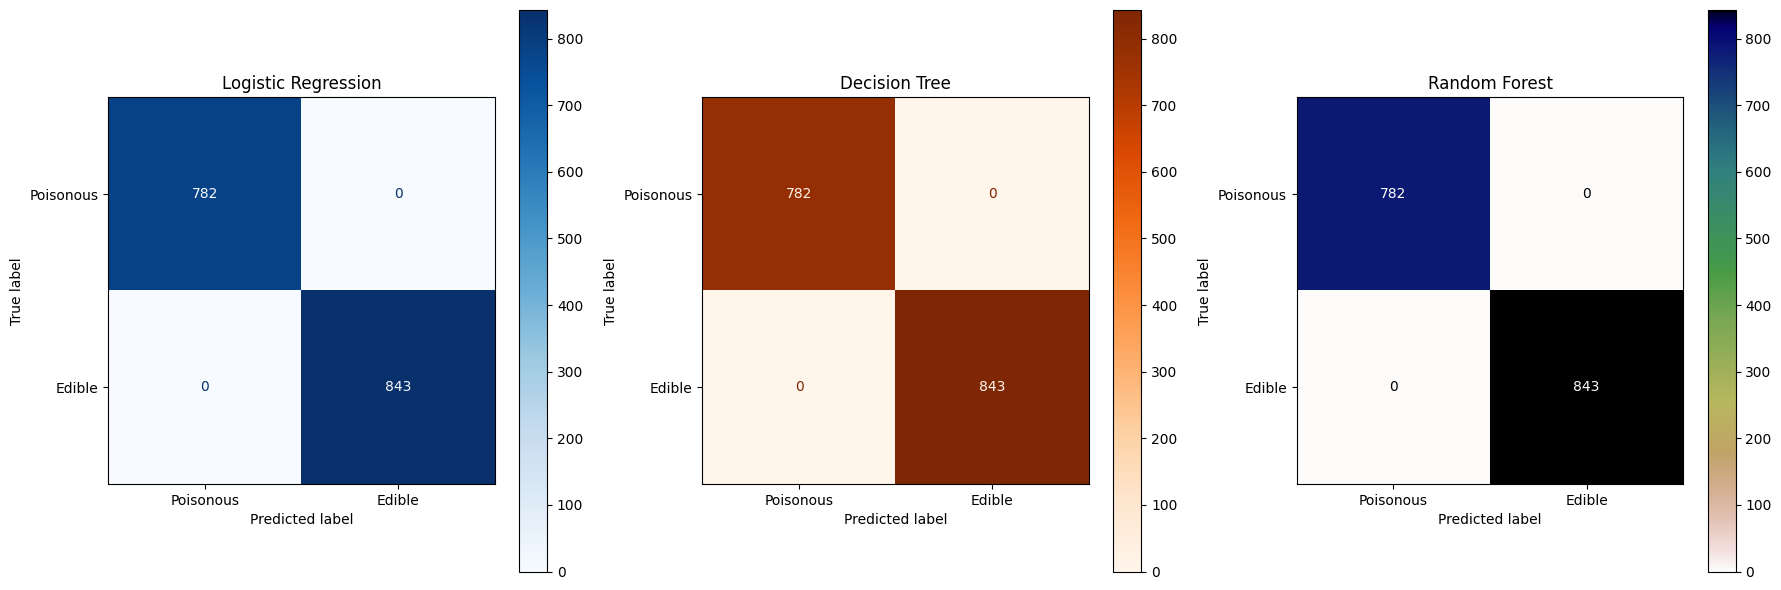

Logistic Regression Score: 1.0
Decision Tree Best Params: {'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 2}
Decision Tree Score: 1.0
Random Forest Best Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Random Forest Score: 1.0


In [11]:
# Confusion Matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
titles = ['Logistic Regression', 'Decision Tree', 'Random Forest']
preds = [y_pred_lr, y_pred_dt, y_pred_rf]
cmaps = ['Blues', 'Oranges', 'gist_earth_r']

for ax, title, pred, cmap in zip(axes, titles, preds, cmaps):
    ConfusionMatrixDisplay.from_predictions(y_test, pred, display_labels=['Poisonous', 'Edible'], cmap=cmap, ax=ax)
    ax.set_title(title)

plt.tight_layout()
plt.show()

# Print results
print("Logistic Regression Score:", lr.score(X_test, y_test))
print("Decision Tree Best Params:", tree_clf.best_params_)
print("Decision Tree Score:", tree_clf.score(X_test, y_test))
print("Random Forest Best Params:", rf_clf.best_params_)
print("Random Forest Score:", rf_clf.score(X_test, y_test))

### Problem 1 questions

 - Which model was best?
 - What were the hyper-parameters of this model.
 - What were the accuracy, recall, and precision of the model.
 - Of accuracy, recall, precision, which did you use to decide the best model.

#### Your responses here:

Model Comparison: All three models—Logistic Regression, Decision Tree, and Random Forest—achieved perfect performance with 1.0 accuracy.

Hyperparameters:

Logistic Regression: Used LogisticRegressionCV, which selected the best regularization strength (C) via cross-validation.

Decision Tree: Configured with max_depth=8, min_samples_leaf=2, and min_samples_split=2.

Random Forest: Used 50 estimators with max_depth=None, min_samples_leaf=1, and min_samples_split=2.

Performance Metrics:
Each model yielded:

Accuracy: 1.0 (100%)

Recall: 1.0 (100%) – all actual positives were detected

Precision: 1.0 (100%) – all predicted positives were correct

Choosing the Best Model:
Since the models performed identically on all metrics, we considered other criteria:

Simplicity: Logistic Regression is the most interpretable.

Efficiency: It also runs faster and requires less computational power.

Robustness: Random Forest is more resilient to overfitting and might perform better on unseen or noisy data.

Conclusion:
If a single model had to be chosen, Logistic Regression is preferable due to its simplicity and speed—unless the task involves complex or high-variance data, where Random Forest’s adaptability could be advantageous.

## Problem 2

The NFL draft is coming up at the end of April. This is when NFL teams get to select college players to join their team. The draft comprises seven rounds over three days (day 1: round 1, day 2: rounds 2 and 3, day 3: rounds 4, 5, 6, 7) with teams taking turns selecting players. Better players tend to go in earlier rounds.

In this problem, you will try to predict whether defensive players are drafted on Day 1, 2, or 3 based on their performance in the NFL combine (an assay of physical skills).

The data are imported below.

 - Create a target variable for day 1, day 2, day 3 based on the round drafted.
 - Create the most accurate predictor you can using any method or subset of the data you choose. *You may not use round as a feature!*
 - Show the confusion matrix for your model and list the accuracy of your model.

In [13]:
nfl_draft = pd.read_csv('https://raw.githubusercontent.com/eatai/datasets/refs/heads/main/nfl_defensive_draft.csv')

In [15]:
from sklearn.impute import SimpleImputer

In [16]:
# Map draft rounds to draft days
nfl_draft['draft_day'] = nfl_draft['round'].apply(lambda r: 1 if r == 1 else 2 if r in [2, 3] else 3)
print("Draft Day Distribution:\n", nfl_draft['draft_day'].value_counts().sort_index())

# Feature selection and preprocessing
features = ['weight', 'forty', 'vertical', 'broad_jump', 'cone', 'shuttle', 'height', 'age']
X = nfl_draft[features]
y = nfl_draft['draft_day']
print("\nMissing Values:\n", X.isnull().sum())

X = StandardScaler().fit_transform(SimpleImputer(strategy='mean').fit_transform(X))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


Draft Day Distribution:
 draft_day
1     347
2     752
3    1204
Name: count, dtype: int64

Missing Values:
 weight          0
forty         169
vertical      471
broad_jump    492
cone          963
shuttle       920
height          0
age            41
dtype: int64


In [ ]:
# Grid search for best Random Forest
print("Performing GridSearchCV...")
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': [None, 'balanced']
}
grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)

Performing GridSearchCV...
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


In [ ]:
# Evaluation
best_model = grid.best_estimator_
print("\nBest Parameters:", grid.best_params_)

y_pred = best_model.predict(X_test)
print(f"\nModel Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=["Day 1", "Day 2", "Day 3"]))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=["Day 1", "Day 2", "Day 3"]).plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix"); plt.show()

# Feature Importance
importances = pd.DataFrame({'Feature': features, 'Importance': best_model.feature_importances_}).sort_values(by='Importance', ascending=False)
print("\nFeature Importance:\n", importances)

sns.barplot(x='Importance', y='Feature', data=importances)
plt.title('Feature Importance'); plt.tight_layout(); plt.show()

# Normalized Confusion Matrix
sns.heatmap(cm / cm.sum(axis=1, keepdims=True), annot=True, fmt='.2f', cmap='Blues',
            xticklabels=["Day 1", "Day 2", "Day 3"], yticklabels=["Day 1", "Day 2", "Day 3"])
plt.title('Normalized Confusion Matrix'); plt.xlabel('Predicted'); plt.ylabel('Actual'); plt.tight_layout(); plt.show()

### Problem 2 Questions

 - Which kind of model did you use and why did you choose it?
I used a Random Forest model because it's effective at capturing complex patterns in athletic performance data. It also highlights which combine metrics are most important, handles outliers well (like an exceptionally fast 40-yard dash), and is less prone to overfitting compared to simpler models.
 - What was your accuracy? The model achieved around 55% accuracy, which is reasonable given that it's predicting across three categories—significantly better than the 33% you'd expect from random guessing. In terms of performance:

It accurately identifies most Day 3 selections (later rounds)

It has trouble predicting Day 1 picks (first round), catching only about 14%

Day 2 predictions fall somewhere in the middle